Chapter 6
# 时间序列中的缺失值
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [4]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader 
import scipy.stats as stats
import pylab

## 下载数据

In [2]:
df = pandas_datareader.data.DataReader(['sp500'], 
                                       data_source='fred', 
                                       start='01-01-2021', 
                                       end='08-01-2021')
df.to_csv('sp500.csv')
df.to_pickle('sp500.pkl')

## 随机插入缺失值

In [3]:
df_NaN = df.copy()

mask = np.random.uniform(0,1,size = df_NaN.shape)

mask = (mask <= 0.3)

df_NaN[mask] = np.NaN
df_NaN.tail

<bound method NDFrame.tail of               sp500
DATE               
2021-01-01      NaN
2021-01-04  3700.65
2021-01-05      NaN
2021-01-06  3748.14
2021-01-07  3803.79
...             ...
2021-07-26  4422.30
2021-07-27  4401.46
2021-07-28  4400.64
2021-07-29      NaN
2021-07-30  4395.26

[151 rows x 1 columns]>

## 向前

In [5]:
df_NaN_forward  = df_NaN.ffill()
# ffill() is equivalent to fillna(method='ffill') 

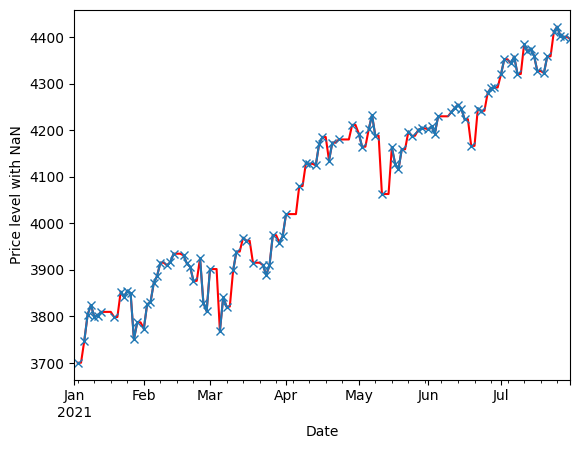

In [6]:
fig, axs = plt.subplots()

df_NaN_forward['sp500'].plot(color = 'r')
df_NaN['sp500'].plot(marker = 'x')
plt.xlabel('Date')
plt.ylabel('Price level with NaN')
plt.show()

## 向后

In [7]:
df_NaN_backward = df_NaN.bfill()
# bfill() is equivalent to fillna(method='bfill')

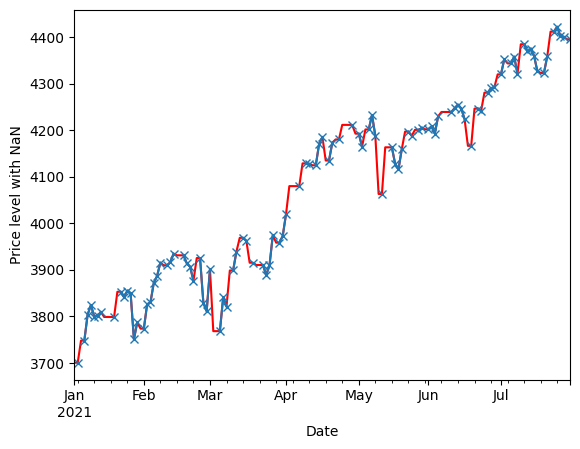

In [8]:
fig, axs = plt.subplots()

df_NaN_backward['sp500'].plot(color = 'r')
df_NaN['sp500'].plot(marker = 'x')
plt.xlabel('Date')
plt.ylabel('Price level with NaN')
plt.show()

#%% interpolation

# If you are dealing with a time series that is growing at an increasing rate, method='quadratic' may be appropriate.
# If you have values approximating a cumulative distribution function, then method='pchip' should work well.
# To fill missing values with goal of smooth plotting, consider method='akima'.

## 线性插值

In [6]:
df_NaN_interpolate = df_NaN.interpolate()

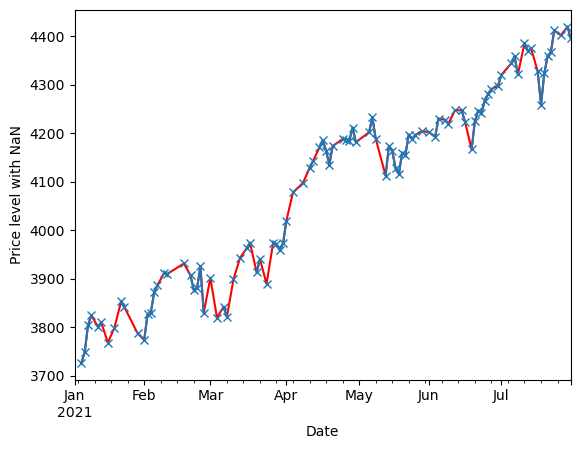

In [6]:
fig, axs = plt.subplots()

df_NaN_interpolate['sp500'].plot(color = 'r')
df_NaN['sp500'].plot(marker = 'x')
plt.xlabel('Date')
plt.ylabel('Price level with NaN')
plt.show()